# Homework 4
Shadrunov Aleksey, BIB201

# explore dataset

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error, r2_score, mean_squared_error



загрузим датасет и посмотрим описание

In [162]:
dataset = load_diabetes()
pd.DataFrame(dataset.data)


,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [163]:
print(dataset.DESCR[328:978].replace("\n\n", "\n"))

**Data Set Characteristics:**
  :Number of Instances: 442
  :Number of Attributes: First 10 columns are numeric predictive values
  :Target: Column 11 is a quantitative measure of disease progression one year after baseline
  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level



воспользуемся примером и нарисуем все данные (ссылка на пример: https://rowannicholls.github.io/python/data/sklearn_datasets/diabetes.html)

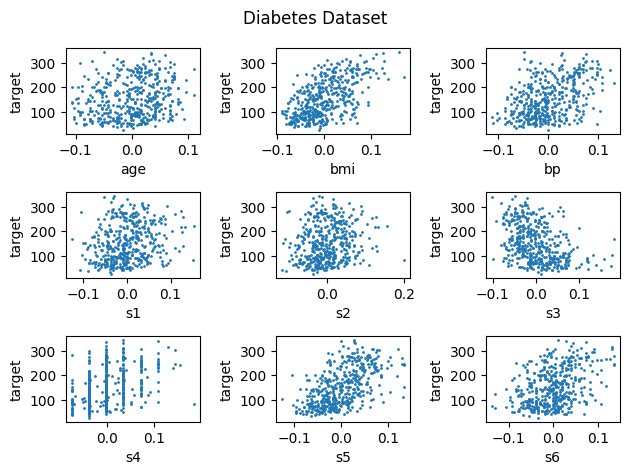

In [164]:
diabetes = load_diabetes(as_frame=True)

# Don't plot the sex data
features = diabetes['feature_names']
features.remove('sex')

# Plot
fig, axs = plt.subplots(3, 3)
fig.suptitle('Diabetes Dataset')
for i in range(3):
    for j in range(3):
        n = j + i * 3
        feature = features[n]
        axs[i, j].scatter(diabetes['data'][feature], diabetes['target'], s=1)
        axs[i, j].set_xlabel(feature)
        axs[i, j].set_ylabel('target')
plt.tight_layout()
plt.show()

# reduce dimensions

в датасете присутствуют 10 переменных и одна целевая переменная. для уменьшения размерности воспользуемся методом **LDA**. 

In [289]:
LDA = LinearDiscriminantAnalysis(n_components=1)
y = dataset["target"]
X = LDA.fit_transform(dataset["data"], y).reshape(len(y))
print("size of X:", len(X))
print("size of y:", len(y))
print("X:", X[:5])
print("y:", y[:5])

size of X: 442
size of y: 442
X: [ 1.66315006 -2.31198262  0.75092513  0.42500918 -0.76077529]
y: [151.  75. 141. 206. 135.]


результат нарисуем на графике

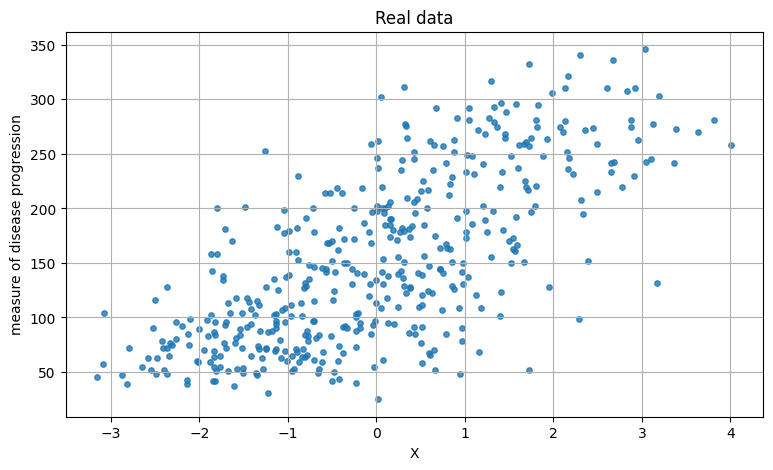

In [166]:
plt.figure(figsize=(9, 5))
plt.grid()
plt.scatter(X, y, s=15, alpha=0.8)
plt.xlabel("X")
plt.ylabel("measure of disease progression")
plt.title("Real data")
plt.show()

# Linear regression from scratch

## Theory

### linear regression

реализуем алгоритм линейной регрессии и применим его к полученным данным.

нам необходимо выбрать прямую $\hat{y_i} = ax_i + b$, которая наиболее точно описывает данные $y$.  

для определения точности нашей прямой существуют **функции ошибок** $S$. мы будем пользоваться функциями **MSE** и **MAE**.  

### gradient descent
задача состоит в минимизации функции ошибки. будем решать её методом **градиентного спуска**.  

**алгоритм**:

```
S — функция ошибки
e — шаг алгоритма (learning rate)
p — количество итераций (number of epochs)
a = a0, b = b0 — исходные значения

for i in range(p):
```
$\ \ \ \ \hat{y} = a_i x + b_i$  

$\ \ \ \ a_i = a_{i-1} - e \cdot \frac{\partial S}{\partial a}|_{a_{i−1}}$  

$\ \ \ \ b_i = b_{i-1} - e \cdot \frac{\partial S}{\partial b}|_{b_{i−1}}$
```
a = a_p, b = b_p — конечные значения
```

### loss functions
выпишем уравнения для **функций потерь** $S_{MSE}$ и $S_{MAE}$. 

### mean squared error:
$$
S_{MSE} = \frac{1}{n} \sum_{i=0}^n (y_i - \hat{y_i})^2 = \frac{1}{n} \sum_{i=0}^n (y_i - (ax_i + b))^2
$$ 

$n$ — число объектов в выборке,  
$y_i$ — реальное значение,  
$\hat{y_i}$ — предсказанное значение

#### MSE derivatives
$$
\frac{\partial S_{MSE}}{\partial a} = \frac{\partial}{\partial a} \left( \frac{1}{n} \sum_{i=0}^n (y_i - (ax_i + b))^2 \right) = \frac{1}{n} \sum_{i=0}^n 2(y_i - (ax_i + b))(-x_i) = \frac{-2}{n} \sum_{i=0}^n x_i (y_i - (ax_i + b)) 
\\  
\frac{\partial S_{MSE}}{\partial b} = \frac{\partial}{\partial b} \left( \frac{1}{n} \sum_{i=0}^n (y_i - (ax_i + b))^2 \right) = \frac{1}{n} \sum_{i=0}^n 2(y_i - (ax_i + b))(-1) = \frac{-2}{n} \sum_{i=0}^n (y_i - (ax_i + b))
$$



### mean absolute error:
$$
S_{MAE} = \frac{1}{n} \sum_{i=0}^n |y_i - \hat{y_i}|
$$, 

$n$ — число объектов в выборке,  
$y_i$ — реальное значение,  
$\hat{y_i}$ — предсказанное значение
#### MAE derivatives
$S_{MAE}$ не дифференцируема в точке, где $y = \hat{y}$, поэтому рассмотрим два луча:

$$
\begin{align*}
& \frac{\partial S_{MAE}}{\partial a} = \frac{\partial}{\partial a} \left( \frac{1}{n} \sum_{i=0}^n |y_i - (ax_i + b)| \right) = \frac{1}{n} \sum_{i=0}^n \frac{\partial}{\partial a} |y_i - (ax_i + b)| = (*)
\\ 
& \frac{\partial}{\partial a} |y_i - (ax_i + b)| = 
\begin{cases}
  \frac{\partial}{\partial a} (y_i - ax_i - b) , \quad y_i > ax_i + b \\
  \frac{\partial}{\partial a} (-y_i + ax_i + b), \quad y_i < ax_i + b 
\end{cases}
\\
& \frac{\partial}{\partial a} |y_i - (ax_i + b)| = 
\begin{cases}
  -x_i, \quad y_i > ax_i + b \\
  x_i, \quad y_i < ax_i + b 
\end{cases}
\\
& (*) = \frac{-1}{n} \sum_{i=0}^n \left( sign(y_i - ax_i - b) \cdot x_i \right)
\\ \ 
\\
& \frac{\partial S_{MAE}}{\partial b} = \frac{1}{n} \sum_{i=0}^n \frac{\partial}{\partial b} |y_i - (ax_i + b)| = (*)
\\ 
& \frac{\partial}{\partial b} |y_i - ax_i - b| = 
\begin{cases}
  \frac{\partial}{\partial b} (y_i - ax_i - b) , \quad y_i > ax_i + b \\
  \frac{\partial}{\partial b} (-y_i + ax_i + b), \quad y_i < ax_i + b 
\end{cases}
\\
& \frac{\partial}{\partial b} |y_i - ax_i - b| = 
\begin{cases}
  -1, \quad y_i > ax_i + b \\
  +1, \quad y_i < ax_i + b 
\end{cases}
\\
& (*) = \frac{-1}{n} \sum_{i=0}^n \left( sign(y_i - ax_i - b) \right)
\\
\end{align*}
$$

## Implementation
реализуем алгоритм

In [181]:
# для вычисления градиентного спуска непосредственно не нужны,
# только для вычисления статистики в конце


def MSE(y, yheap) -> float:
    """mean squared error"""
    return np.mean((y - yheap) ** 2)


def MAE(y, yheap) -> float:
    """mean absolute error"""
    return np.mean(abs(y - yheap))


In [182]:
def d_mse(X, y, yheap):
    """calculates dS/da and dS/db for MSE"""
    da = -2 * np.mean(X * (y - yheap))
    db = -2 * np.mean(y - yheap)
    return da, db


def d_mae(X, y, yheap):
    """calculates dS/da and dS/db for MAE"""
    da = -1 * np.mean(X * np.sign(y - yheap))
    db = -1 * np.mean(np.sign(y - yheap))
    return da, db


## GD with MSE

запустим алгоритм. на графике покажем, как изменялись параметры $a$ и $b$

MSE a    MSE b    
37.830   152.133  


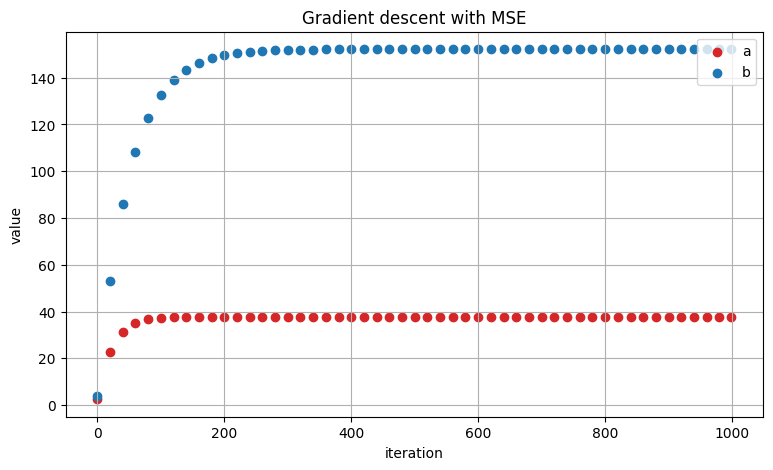

In [292]:
e = 0.01  # learning rate
p = 1000  # number of epochs
a, b = 1, 1  # initial values

plt.figure(figsize=(9, 5))
plt.grid()

for iteration in range(p):
    yheap = a * X + b

    da, db = d_mse(X, y, yheap)

    a = a - e * da
    b = b - e * db

    if iteration % 20 == 0:
        plt.scatter(iteration, a, c='tab:red')
        plt.scatter(iteration, b, c='tab:blue')


mse_a, mse_b = a, b
print("{:<9}{:<9}".format("MSE a", "MSE b"))
print("{:<9.3f}{:<9.3f}".format(mse_a, mse_b))


plt.scatter(iteration, a, c='tab:red', label="a")
plt.scatter(iteration, b, c='tab:blue', label="b")
plt.xlabel("iteration")
plt.ylabel("value")
plt.title("Gradient descent with MSE")
plt.legend(loc="upper right")
plt.show()


## GD with MAE

запустим алгоритм. на графике покажем, как изменялись параметры $a$ и $b$

MAE a    MAE b    
37.972   148.697  


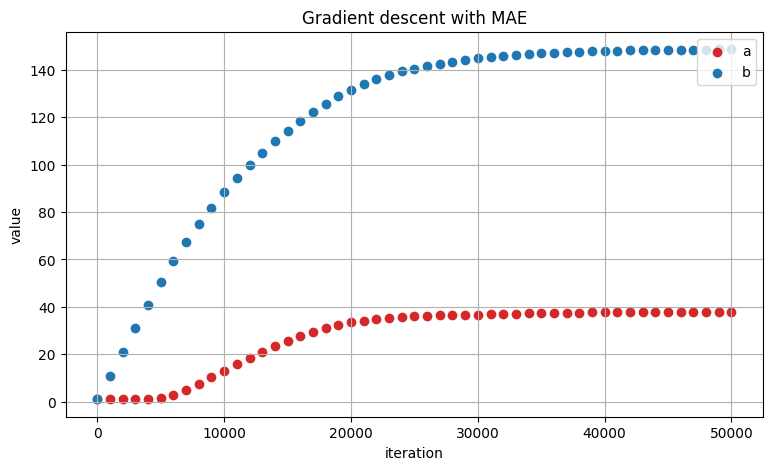

In [293]:
e = 0.01  # learning rate
p = 50000  # number of epochs
a, b = 1, 1  # initial values

plt.figure(figsize=(9, 5))
plt.grid()

for iteration in range(p):
    yheap = a * X + b

    da, db = d_mae(X, y, yheap)

    a = a - e * da
    b = b - e * db

    if iteration % 1000 == 0:
        plt.scatter(iteration, a, c='tab:red')
        plt.scatter(iteration, b, c='tab:blue')


mae_a, mae_b = a, b
print("{:<9}{:<9}".format("MAE a", "MAE b"))
print("{:<9.3f}{:<9.3f}".format(mae_a, mae_b))


plt.scatter(iteration, a, c='tab:red', label="a")
plt.scatter(iteration, b, c='tab:blue', label="b")
plt.xlabel("iteration")
plt.ylabel("value")
plt.title("Gradient descent with MAE")
plt.legend(loc="upper right")
plt.show()


покажем полученный результат на графике:

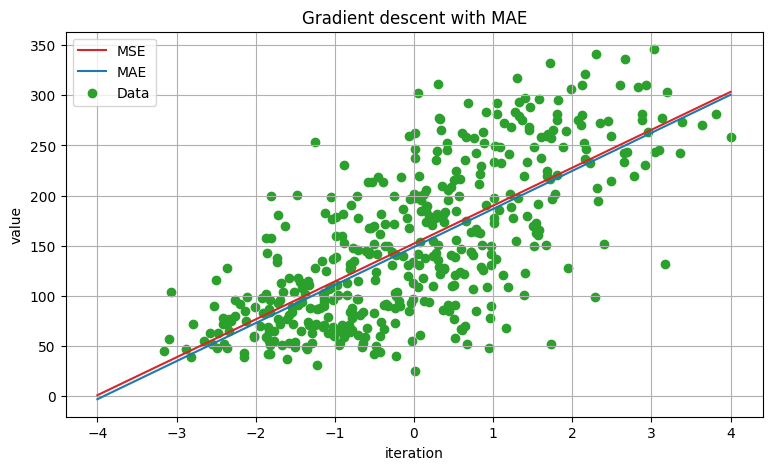

MSE      MAE      
2962.904 43.739   


In [294]:
plt.figure(figsize=(9, 5))
plt.grid()

x_axis = np.linspace(-4, 4, 9)

plt.plot(x_axis, mse_a * x_axis + mse_b, c="tab:red", label="MSE")
plt.plot(x_axis, mae_a * x_axis + mae_b, c="tab:blue", label="MAE")
plt.scatter(X, y, c="tab:green", label="Data")
plt.xlabel("iteration")
plt.ylabel("value")
plt.title("Gradient descent with MAE")
plt.legend()
plt.show()

print("{:<9}{:<9}".format("MSE", "MAE"))
print("{:<9.3f}{:<9.3f}".format(MSE(y, mse_a * X + mse_b), MAE(y, mae_a * X + mae_b)))

# LinearRegression

воспользуемся встроенной в **sklearn** реализацией линейной регрессии

In [295]:
skl = LinearRegression()
skl.fit(X.reshape(442,1), y)

# коэффициенты в регрессионной прямой
skl_a = skl.coef_
skl_b = skl.intercept_

покажем полученный результат на графике:

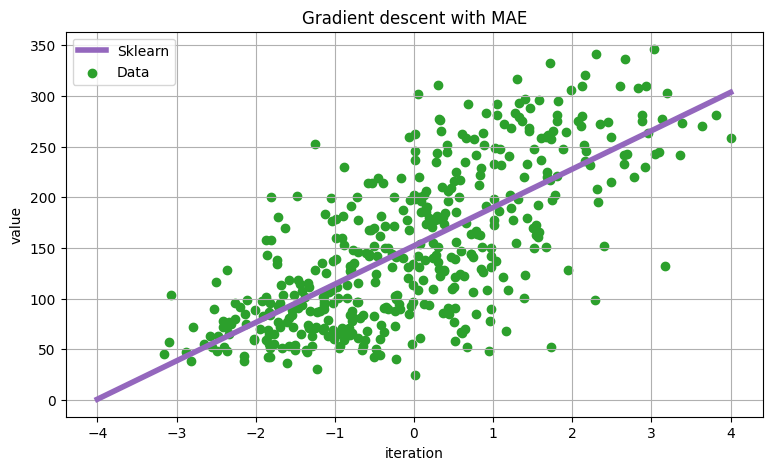

In [298]:
plt.figure(figsize=(9, 5))
plt.grid()

x_axis = np.linspace(-4, 4, 9)

plt.plot(x_axis, skl_a * x_axis + skl_b, c="tab:purple", label="Sklearn", linewidth=4)
plt.scatter(X, y, c="tab:green", label="Data")
plt.xlabel("iteration")
plt.ylabel("value")
plt.title("Gradient descent with MAE")
plt.legend()
plt.show()

# Metrics

для всех трех реализаций линейной регрессии вычислим метрики качества: MSE, MSLE, MAE, $R^2$, RMSE

In [299]:
results = {"MSE": [], "MSLE": [], "MAE": [], "R^2": [], "RMSE": []}

results["MSE"] = [
    MSE(y, mse_a * X + mse_b),  # GD with MSE
    MSE(y, mae_a * X + mae_b),  # GD with MAE
    MSE(y, skl_a * X + skl_b),  # Sklearn
]

results["MSLE"] = [
    mean_squared_log_error(y, mse_a * X + mse_b),  # GD with MSE
    mean_squared_log_error(y, mae_a * X + mae_b),  # GD with MAE
    mean_squared_log_error(y, skl_a * X + skl_b),  # Sklearn
]

results["MAE"] = [
    MAE(y, mse_a * X + mse_b),  # GD with MSE
    MAE(y, mae_a * X + mae_b),  # GD with MAE
    MAE(y, skl_a * X + skl_b),  # Sklearn
]

results["R^2"] = [
    r2_score(y, mse_a * X + mse_b),  # GD with MSE
    r2_score(y, mae_a * X + mae_b),  # GD with MAE
    r2_score(y, skl_a * X + skl_b),  # Sklearn
]

results["RMSE"] = [
    mean_squared_error(y, mse_a * X + mse_b, squared=False),  # GD with MSE
    mean_squared_error(y, mae_a * X + mae_b, squared=False),  # GD with MAE
    mean_squared_error(y, skl_a * X + skl_b, squared=False),  # Sklearn
]

In [300]:
print("{:>15}{:>15}{:>15}{:>15}".format("", "GD with MSE", "GD with MAE", "Sklearn"))
for key in results:
    print("{:<15}{:>15.3f}{:>15.3f}{:>15.3f}".format(key, *results[key]))


                   GD with MSE    GD with MAE        Sklearn
MSE                   2962.904       2974.755       2962.904
MSLE                     0.175          0.173          0.175
MAE                     43.755         43.739         43.755
R^2                      0.500          0.498          0.500
RMSE                    54.433         54.541         54.433


видим по метрикам, что результат нашей реализации линейной регрессии с использованием MSE ничем не отличается от встроенного в библиотеку.  

при этом реализация с MAE отрабатывает немного хуже остальных.

# Final plot

покажем все три регрессии на графике:

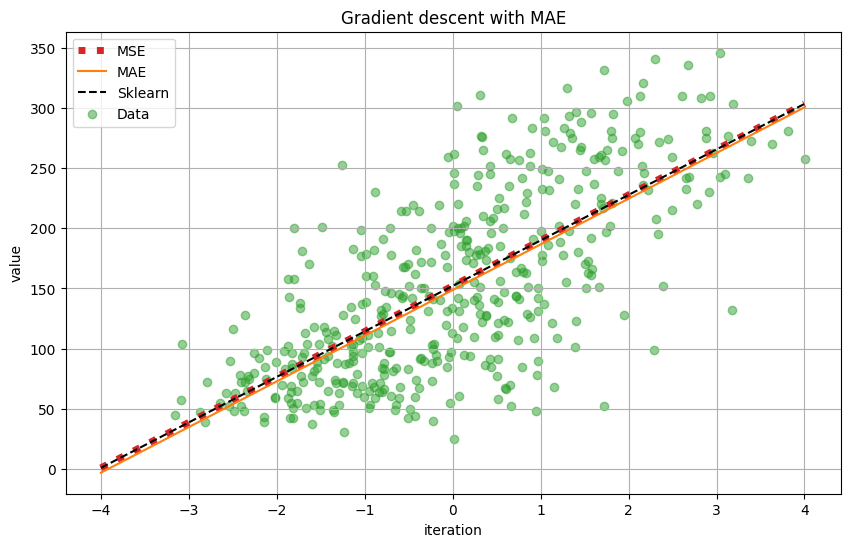

In [304]:
plt.figure(figsize=(10, 6))
plt.grid()

x_axis = np.linspace(-4, 4, 9)

plt.plot(x_axis, mse_a * x_axis + mse_b, ':', c="tab:red", label="MSE", linewidth=5)
plt.plot(x_axis, mae_a * x_axis + mae_b, c="tab:orange", label="MAE")
plt.plot(x_axis, skl_a * x_axis + skl_b, '--', c="k", label="Sklearn")
plt.scatter(X, y, c="tab:green", label="Data", alpha=0.5)
plt.xlabel("iteration")
plt.ylabel("value")
plt.title("Gradient descent with MAE")
plt.legend()
plt.show()